In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
'''
 Purpose:
 - Implement modified version of ecgplots package to plot counterfactual explanations for ECG data
 
 Inputs: sample, distractor, explanation (features to swtich)
 Output: ECGPlot

 Note: 
 - this notebook is used for visualization purposes only. The data is not relevant.

'''

'\n Purpose:\n - Implement modified version of ecgplots package to plot counterfactual explanations for ECG data\n \n Inputs: sample, distractor, explanation (features to swtich)\n Output: ECGPlot\n\n Note: \n - this notebook is used for visualization purposes only. The data is not relevant.\n\n'

In [3]:
# third party modules
import os
import h5py
import math
import pandas as pd
import numpy as np
import time
# from tensorflow.keras.utils import Sequence
# from tensorflow.keras.layers import (
#     Input, Conv1D, MaxPooling1D, Dropout, BatchNormalization, Activation, Add, Flatten, Dense)
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import (ModelCheckpoint, TensorBoard, ReduceLROnPlateau,
#                                         CSVLogger, EarlyStopping)
# from tensorflow.keras.models import load_model
# from sklearn.pipeline import Pipeline


import sys
sys.path.append('/projectnb/peaclab-mon/JLi/projectx/CoMTE_V2_JLi')  
# project modules
import datasets as datasets


 # define environmental variables to prevent overuse of CPU Cores
 # Access and modify environmental variables
os.environ['TF_NUM_INTRAOP_THREADS'] = '1' #set to 1
os.environ['TF_NUM_INTEROP_THREADS'] = '3' #set to 1 less than # of requested cores
print(f"TF_NUM_INTRAOP_THREADS is {os.getenv('TF_NUM_INTRAOP_THREADS')}")
print(f"TF_NUM_INTEROP_THREADS is {os.getenv('TF_NUM_INTEROP_THREADS')}")



2025-08-23 17:57:08.891091: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-23 17:57:09.660504: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-23 17:57:09.845778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755986230.364017  411558 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755986230.414319  411558 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-23 17:57:11.250945: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

TF_NUM_INTRAOP_THREADS is 1
TF_NUM_INTEROP_THREADS is 3


In [4]:
class ECG_plots_raw_data: 
    
    # load in testing dataset 
    path_to_hdf5_test = "/projectnb/peaclab-mon/JLi/projectx/AutoECGDiagnosisData/CODE/ecg_tracings.hdf5"
    dataset_name_test = "tracings"  
    f = h5py.File(path_to_hdf5_test, "r")
    timeseries = np.array(f[dataset_name_test])
    print(timeseries.shape)

    # load in distractor
    # distractor = 


    # # load in explanation
    # explanation = 

(827, 4096, 12)


In [5]:
'''
    Purpose: ensure inputs meet ECG_plots_counterfactual specifications
    Input: 
        sample = numpy array (MxN) where M = # leads and N = datapoints/signal
        distractor = numpy array (MxN) where M = # leads and N = datapoints/signal
        explanation = numpy array (Dx1) where is D = number of features that are switched 
        sample rate =  400hz (for our implementation)
        title = title shown on chart
        lead_index = lead name array in the same order of sample will be shown on the left of signal plot
        lead_order = lead display order
        columns = display columns
        style = display style
        row_height = number of grids a lead signal should have 
        show_lead_name = show lead name? 
        show_grid = show grid?
        show_separate_line = show separate line? 

    Output: 
        ECG plot
'''

class ECG_plots_inputs:

    sample_idx = 100
    distractor_idx = 6

    sample = ECG_plots_raw_data.timeseries[sample_idx,:,:]
    sample = sample.T
    
    distractor = ECG_plots_raw_data.timeseries[distractor_idx,:,:]
    distractor = distractor.T

    explanation = np.array([1,3,5,9])
    


In [6]:
# validation
print(ECG_plots_raw_data.timeseries.shape)
print(type(ECG_plots_raw_data.timeseries))
print(ECG_plots_inputs.sample.shape)
print(ECG_plots_inputs.distractor.shape)
print(ECG_plots_inputs.explanation.shape)

(827, 4096, 12)
<class 'numpy.ndarray'>
(12, 4096)
(12, 4096)
(4,)


In [15]:
# import and run ECG_plots_counterfactual
'''
    link to original ecg_plot repo: https://github.com/dy1901/ecg_plot 
'''

import sys
sys.path.insert(0,"/projectnb/peaclab-mon/JLi/projectx/CoMTE_V2_JLi/ECG_Visualization/ecg_plot_counterfactual")
import ecg_plot_counterfactual 

ECG Counterfactual Plot:
-71.5
6.0
defining styles alpha
else
overlaying counterfactual with offset shift
overlaying counterfactual with offset shift
overlaying counterfactual with offset shift
overlaying counterfactual with offset shift
saving


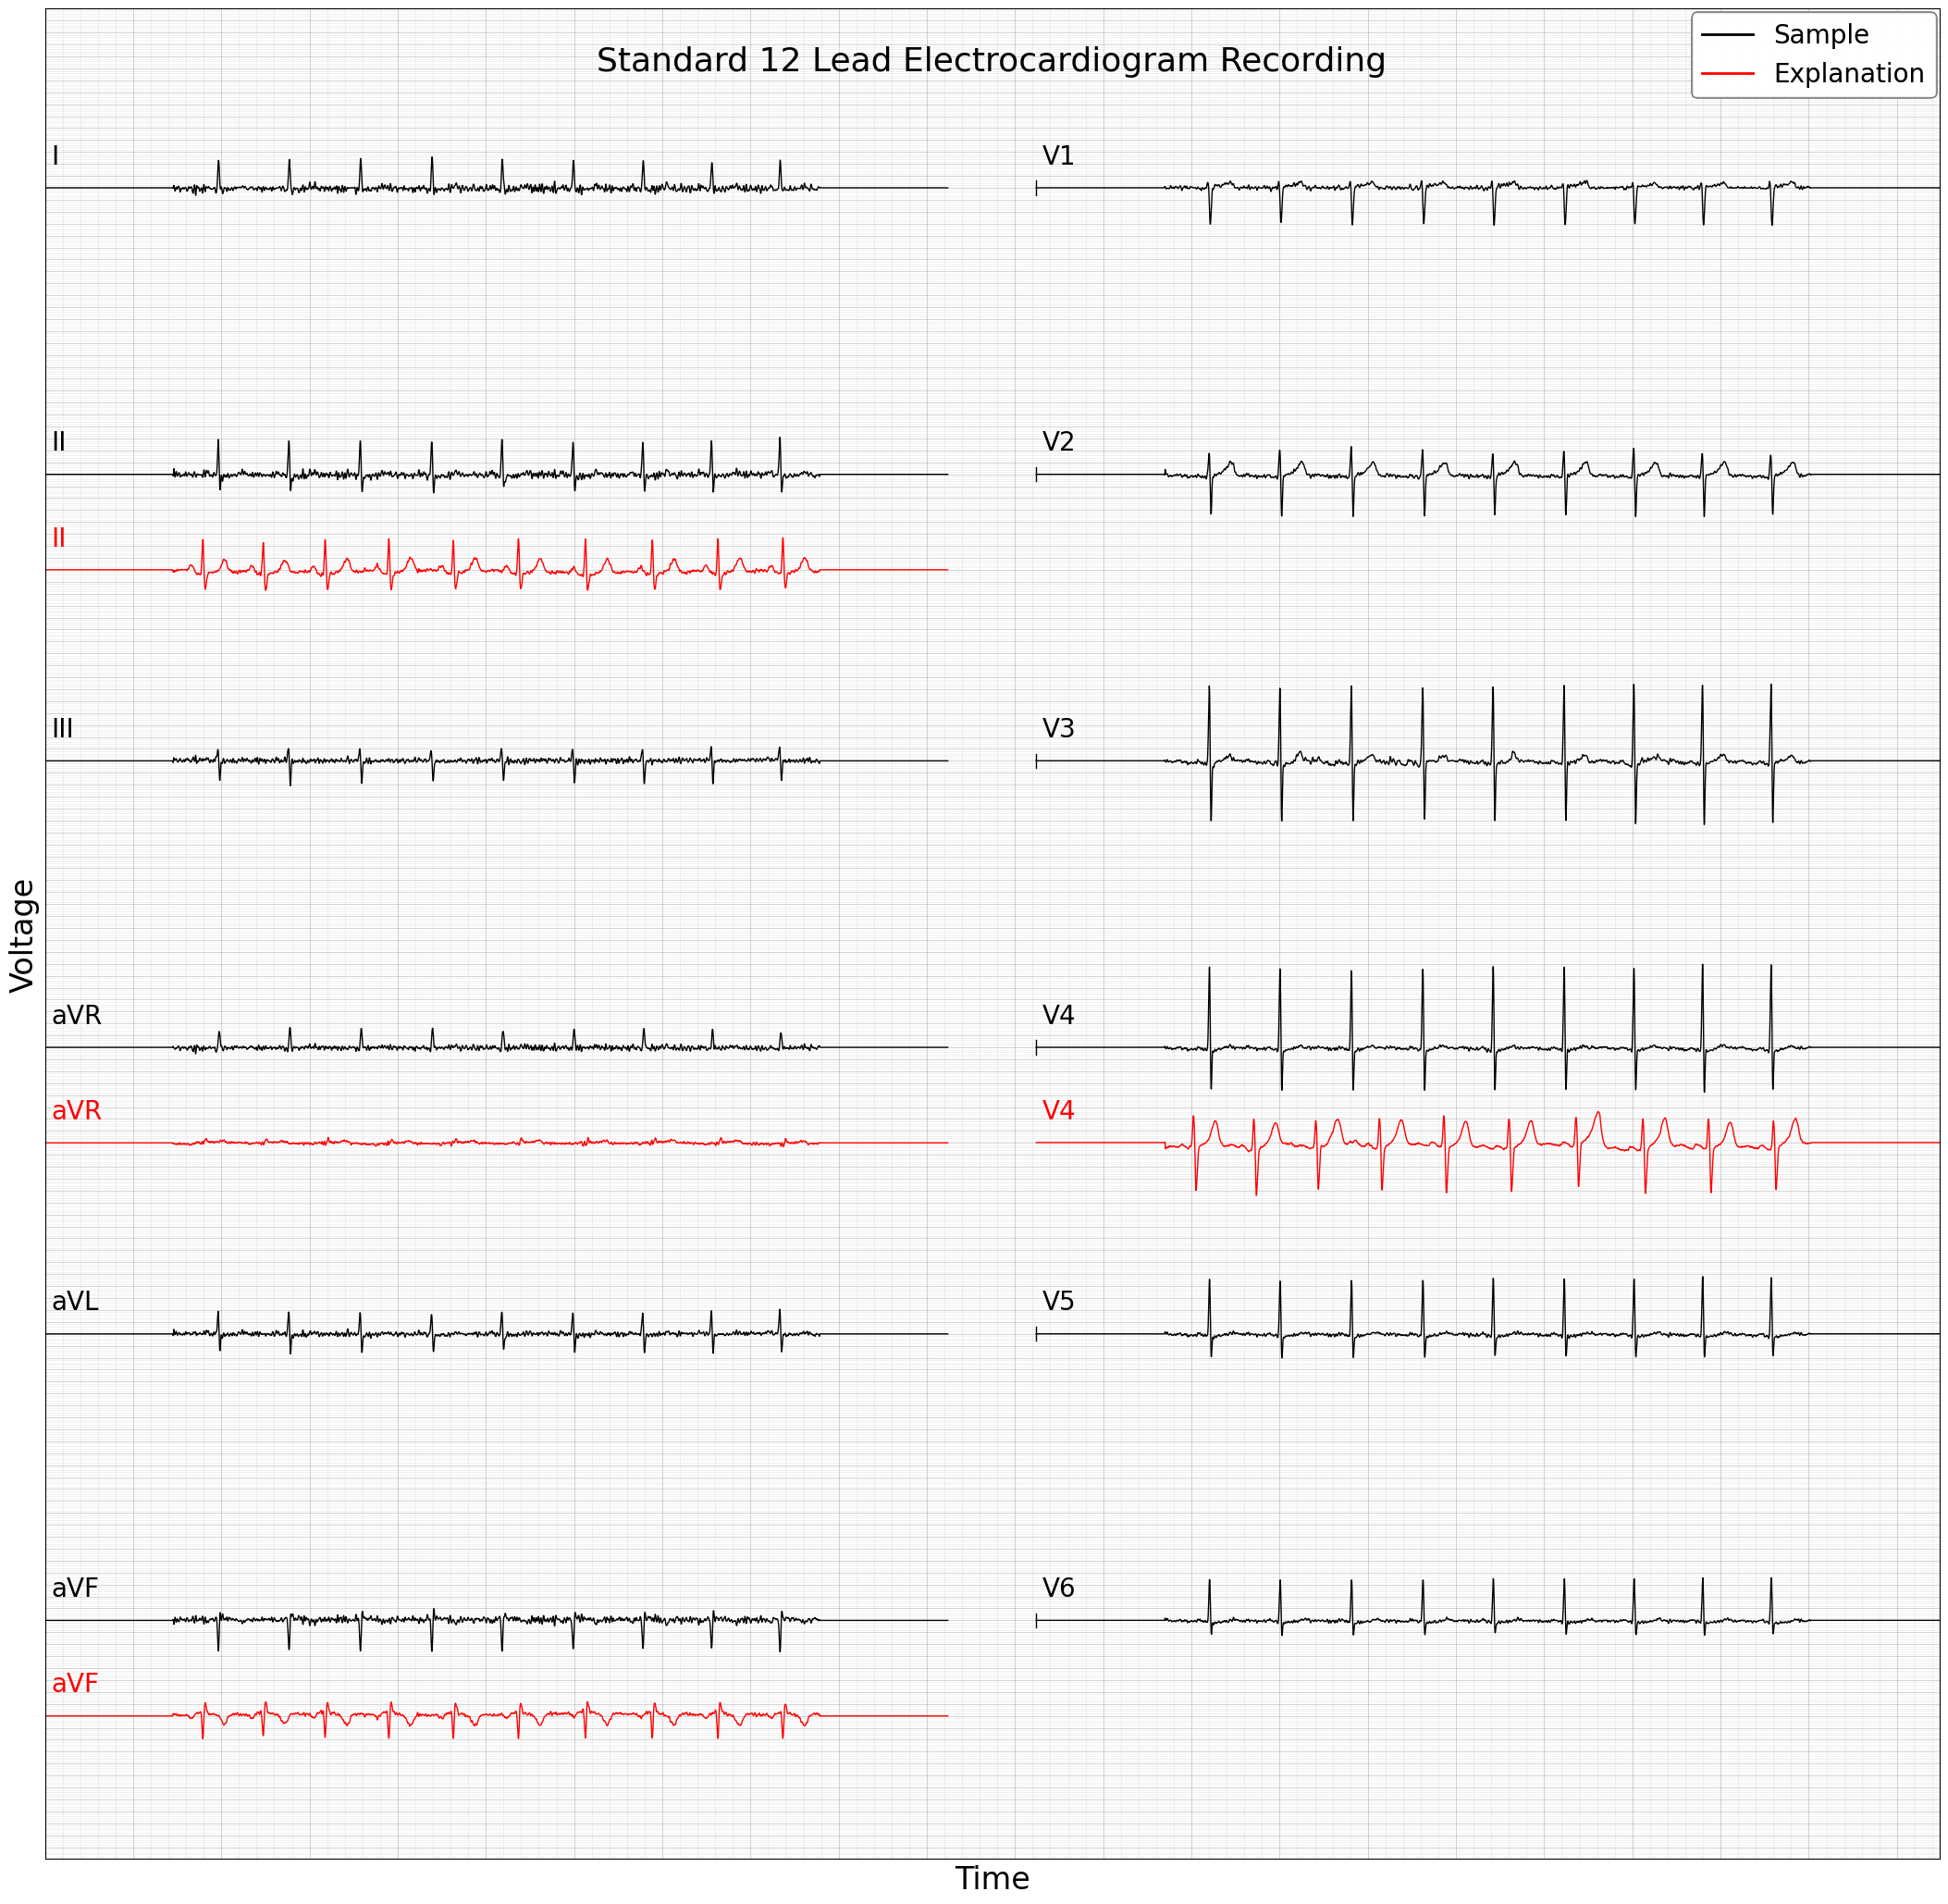

In [20]:
# test changes 

save_path = f"Sample_1.jpg"
ecg_plot_counterfactual.plot(ECG_plots_inputs.sample, ECG_plots_inputs.distractor, ECG_plots_inputs.explanation, save_path, sample_rate = 400, title = 'Standard 12 Lead Electrocardiogram Recording', style = 'bw', row_height = 10)
ecg_plot_counterfactual.show()

In [9]:
# save off samples with pkl...
# save samples individually in dictionaries/pkl, so we don't have to open everything again to access data

sample_dictionary = {"sample":ECG_plots_inputs.sample, 
                     "distractor": ECG_plots_inputs.distractor, 
                     "explanation": ECG_plots_inputs.explanation}

import pickle
with open(f"{save_path}_data.pkl", "wb") as f:
    pickle.dump(sample_dictionary, f)

In [10]:
# open pkl

with open(f"{save_path}_data.pkl", "rb") as f:
    sample_dictionary_reopened = pickle.load(f)

print(sample_dictionary_reopened['sample'].shape)
print(sample_dictionary_reopened['distractor'].shape)
print(sample_dictionary_reopened['explanation'].shape)

(12, 4096)
(12, 4096)
(4,)


--- Code Dataset Details ---

Lead Order For Code15% Dataset: 
[DI, DII, DIII, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6]

Sampling Rate:
400 Hz

Voltage Units:
mV (not explicitly stated in documentation, but assumed since mV's are the standard)

Disease Mapping:
0: Normal 
1: 1st degree AV block(1dAVb)
2: right bundle branch block (RBBB)
3: left bundle branch block (LBBB)
4: sinus bradycardia (SB)
5: atrial fibrillation (AF)
6: sinus tachycardia (ST)

Comments: 
Some signals originally have a duration of 10 seconds (10 * 400 = 4000 samples) and others of 7 seconds (7 * 400 = 2800 samples). In order to make them all have the same size (4096 samples), we fill them with zeros on both sizes.